In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

In [33]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
concrete_data.shape

(1030, 9)

In [35]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [36]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [37]:
X = concrete_data.drop('Strength', axis=1)
y = concrete_data['Strength'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(len(y), len(y_train),len(y_test))

1030 721 309


In [39]:
'''normalized data'''
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train) #only on train test, it is cheat to fit on test set!!!
X_test=scaler.transform(X_test)

In [40]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [41]:
# build the model
model = regression_model()

In [42]:
history=model.fit(x=X_train, y=y_train,               
                  validation_data=(X_test, y_test),
                  epochs=100, 
                  verbose=2)

Train on 721 samples, validate on 309 samples
Epoch 1/100
721/721 - 0s - loss: 1496.7860 - val_loss: 1561.7165
Epoch 2/100
721/721 - 0s - loss: 1415.7847 - val_loss: 1447.3864
Epoch 3/100
721/721 - 0s - loss: 1260.4306 - val_loss: 1228.1923
Epoch 4/100
721/721 - 0s - loss: 978.9427 - val_loss: 860.8479
Epoch 5/100
721/721 - 0s - loss: 595.6265 - val_loss: 462.6389
Epoch 6/100
721/721 - 0s - loss: 291.8655 - val_loss: 264.2681
Epoch 7/100
721/721 - 0s - loss: 213.0677 - val_loss: 243.3982
Epoch 8/100
721/721 - 0s - loss: 206.5887 - val_loss: 234.6218
Epoch 9/100
721/721 - 0s - loss: 197.3998 - val_loss: 226.2308
Epoch 10/100
721/721 - 0s - loss: 190.0597 - val_loss: 216.4235
Epoch 11/100
721/721 - 0s - loss: 181.7708 - val_loss: 207.1411
Epoch 12/100
721/721 - 0s - loss: 173.5213 - val_loss: 197.5344
Epoch 13/100
721/721 - 0s - loss: 164.3223 - val_loss: 186.8925
Epoch 14/100
721/721 - 0s - loss: 154.2651 - val_loss: 174.9980
Epoch 15/100
721/721 - 0s - loss: 144.6723 - val_loss: 164.24

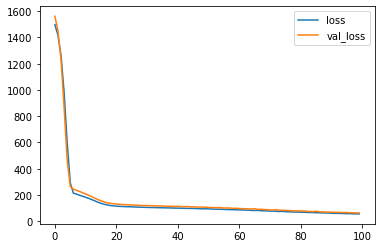

In [43]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [31]:
print(model.evaluate(X_train, y_train, verbose=0))
print(model.evaluate(X_test, y_test, verbose=0)) #verbose

59.17955380041622
69.3659255882683


In [44]:
y_test_pred=model.predict(X_test)
y_test_pred

array([[ 7.550396 ],
       [20.114178 ],
       [33.16448  ],
       [19.14252  ],
       [46.93008  ],
       [49.292297 ],
       [54.523422 ],
       [15.706311 ],
       [48.369297 ],
       [53.775124 ],
       [26.044765 ],
       [29.162958 ],
       [32.999092 ],
       [54.582226 ],
       [15.676045 ],
       [37.652824 ],
       [17.459406 ],
       [40.815945 ],
       [31.021662 ],
       [11.565117 ],
       [27.59485  ],
       [36.3323   ],
       [44.400707 ],
       [26.038853 ],
       [49.79167  ],
       [28.192448 ],
       [25.77575  ],
       [25.097473 ],
       [41.719246 ],
       [55.70053  ],
       [36.138435 ],
       [76.34219  ],
       [23.258837 ],
       [64.46355  ],
       [15.874106 ],
       [25.24428  ],
       [33.855236 ],
       [46.407467 ],
       [30.25653  ],
       [25.157099 ],
       [53.15238  ],
       [46.15709  ],
       [51.227932 ],
       [58.173977 ],
       [54.59035  ],
       [30.614054 ],
       [42.04569  ],
       [22.98

In [45]:
y_test_pred=pd.Series(y_test_pred.reshape(X_test.shape[0]))
y_test_pred

0       7.550396
1      20.114178
2      33.164478
3      19.142521
4      46.930080
         ...    
304    33.822723
305    23.675741
306    39.118320
307    39.046009
308    46.831608
Length: 309, dtype: float32

In [46]:
pred_df=y_test
pred_df

605     6.47
572    13.09
920    29.07
921     9.74
74     29.00
       ...  
872    32.40
931    15.34
27     52.12
749    36.94
522    44.52
Name: Strength, Length: 309, dtype: float64

In [47]:
pred_df=pd.concat([pred_df, y_test_pred], axis=1)

pred_df.columns=['Test True Y', 'Model Predictions']
print(pred_df.head(10))

   Test True Y  Model Predictions
0        79.99           7.550396
1          NaN          20.114178
2          NaN          33.164478
3          NaN          19.142521
4          NaN          46.930080
5          NaN          49.292297
6        43.70          54.523422
7        36.45          15.706311
8        45.85          48.369297
9        39.29          53.775124


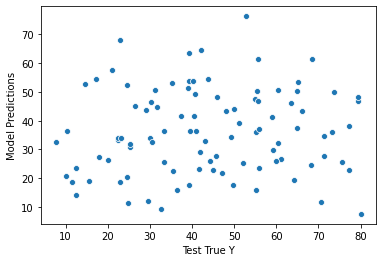

In [49]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.show()

In [50]:
print(model.evaluate(X, y, verbose=0)) #verbose


226587301.56116503


In [51]:
# or Evaluation for Linear Regression metrics workd for df, when we have array we have to use another one
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R2:", metrics.explained_variance_score(y_test, y_test_pred))

MSE: 62.39732558447611
MAE: 5.837506125119898
RMSE: 2.416093153237246
R2: 0.7988514214970782
